In [1]:
import os
import sys
import pandas as pd
import numpy as np
import gc
import importlib

# visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="whitegrid", font_scale= 1.5)
from IPython.display import display

# import data

In [2]:
path= os.path.join( os.getcwd(), 'data', 'census_income_data.csv')
data= pd.read_csv(path)

print('data shape: ', data.shape)
display(data.head())
display(data.tail())

data shape:  (48842, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [3]:
import subprocess
data.head().iloc[:, :8].to_html('.\\presentation\\table_1.html')
subprocess.call(
    'wkhtmltoimage -f png --width 0 table_1.html table.png', shell=True)

data.head().iloc[:, 8:].to_html('.\\presentation\\table_2.html')
subprocess.call(
    'wkhtmltoimage -f png --width 0 table.html table_2.png', shell=True)

1

Let's take a look at different levels of the output variable:

In [4]:
data['income'].value_counts(normalize= True)

 <=50K     0.506122
 <=50K.    0.254596
 >50K      0.160538
 >50K.     0.078744
Name: income, dtype: float64

Looking at different levels, it makes sense to consider the levels with . as the ones for test data:

0.254596/ 0.078744 ~ 3.23

0.506122/ 0.160538 ~ 3.15

In other words, bith zero ( <=50k) and one (>50k) have more or less the same propertions in the train-test split.

Besides, the percentage of test data will be more or less 32% or one third of the whole data. which is again good from an ML practice!

**train-test split**

In [5]:
train= data.loc[ (data['income']== ' <=50K') | (data['income']== ' >50K') ]
print('train shape: ', train.shape)

test= data.loc[ ~ data.index.isin(train.index) ]
# ignore the output column
# we save the output column in y_test
y_test= test.copy().iloc[:, -1]
test= test.iloc[:, :-1] 
print('test shape: ', test.shape)

# we also correct the indices of both train and test data
train.index= range(len(train))
test.index= range(len(test))

train shape:  (32561, 15)
test shape:  (16281, 14)


In [6]:
display(train.head(2))
display(test.head(2))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States


**import our data_analysis class**

In [7]:
if 'class_data_analysis' not in sys.modules:
    import class_data_analysis
else:
    importlib.reload(class_data_analysis)
    print('Package reloaded!')

# analysis

* variable identification
* NaN analysis
* data cleaning
* univariate EDA
* bivariate EDA
* feature engineering

In [8]:
#%%capture
da= class_data_analysis.DataAnalysis(train, test, 'income')
da.var_iden()
da.na_analysis()
da.data_cleaning()

*************** Variable Identification *************** 

train shape:  (32561, 15)
test.shape:  (16281, 14)

Numerical features are: 
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Categorical features are: 
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

description of train data:  

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000     

([<matplotlib.axis.YTick at 0x1fec26760b8>,
 <a list of 6 Text yticklabel objects>)

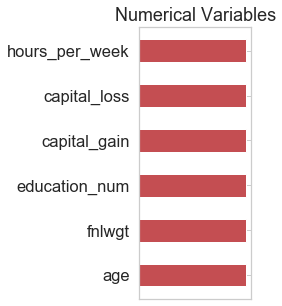

In [9]:
plt.figure(figsize= (2,5))
plt.title("Numerical Variables")
plt.barh(range( len(da.num_features)), width= 0.2, height= 0.5, color= "r",  align= "center" )
plt.xticks([] )
plt.yticks( range( len(da.num_features)),  da.num_features , rotation= 0)

([<matplotlib.axis.YTick at 0x1fec2714358>,
 <a list of 8 Text yticklabel objects>)

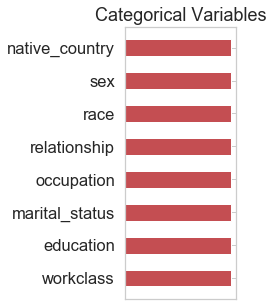

In [10]:
plt.figure(figsize= (2,5))
plt.title("Categorical Variables")
plt.barh(range( len(da.cat_features)), width= 0.2, height= 0.5, color= "r",  align= "center" )
plt.xticks([] )
plt.yticks( range( len(da.cat_features)),  da.cat_features , rotation= 0)
#plt.xlim( [-1, len(da.num_features) ] )

**Observations:**

1. There are no missing values, which is very good. 


2. In general, there were 30 duplicated rows, which were dropped from both train and test data


3. Although variable education_num is numerical, but it may be also categorical. We have to see if we can find a linear relationship between increasing education_num and the response variable, and if so, we leave as it is, and if not we can consider it as categorical. But in tree-based models, it can stay the way it is. This was more about linear-based models!

# Univariate EDA
* Distribution of numerical and categorical feattures

* dispersion plot for numerical features vs the row index

In [11]:
print(da.cat_features)
print(da.num_features)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


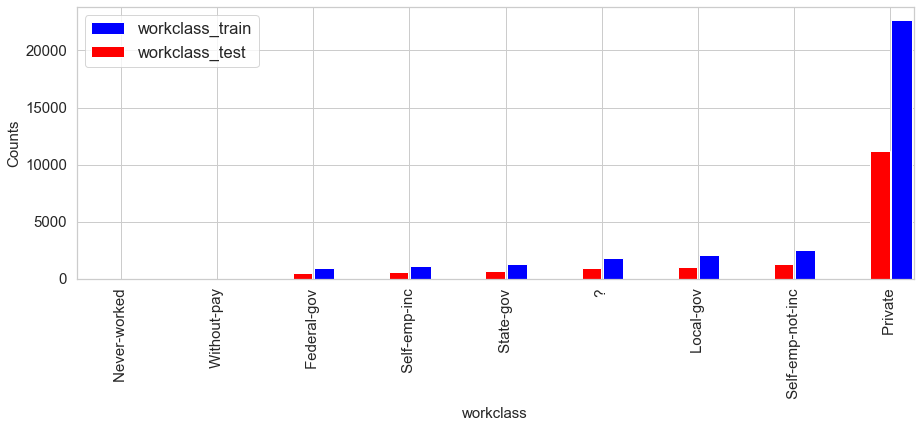

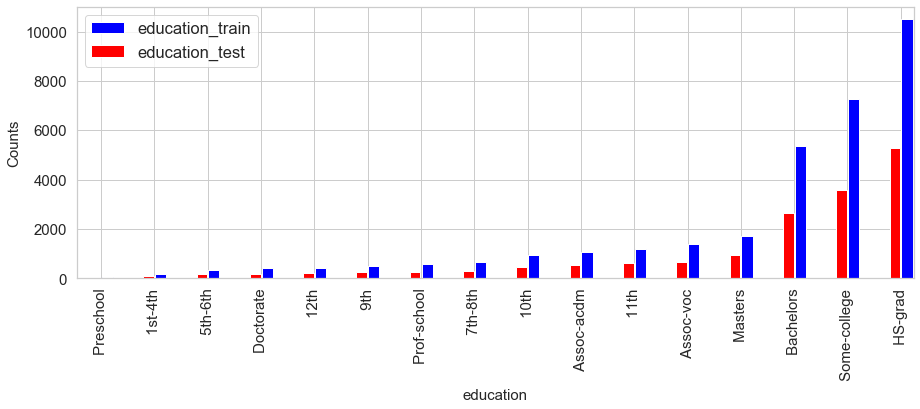

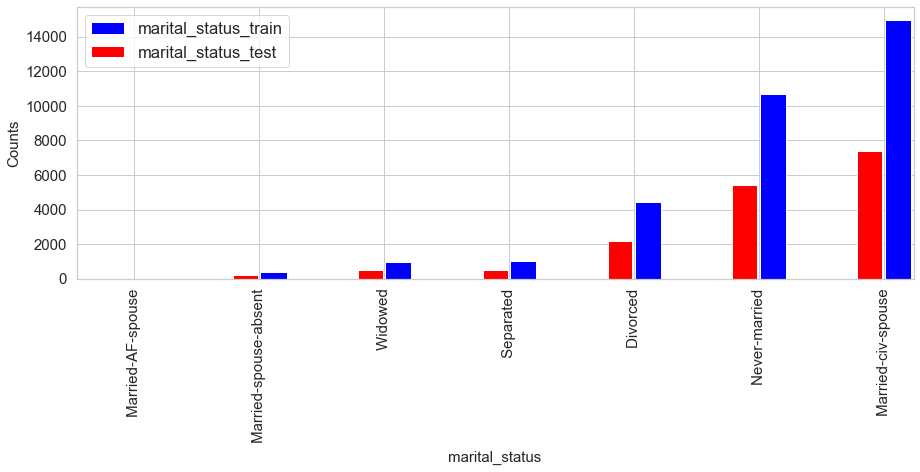

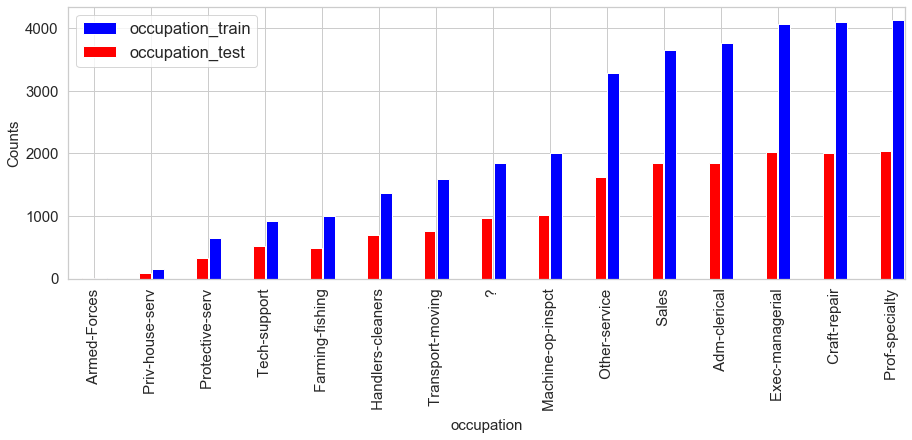

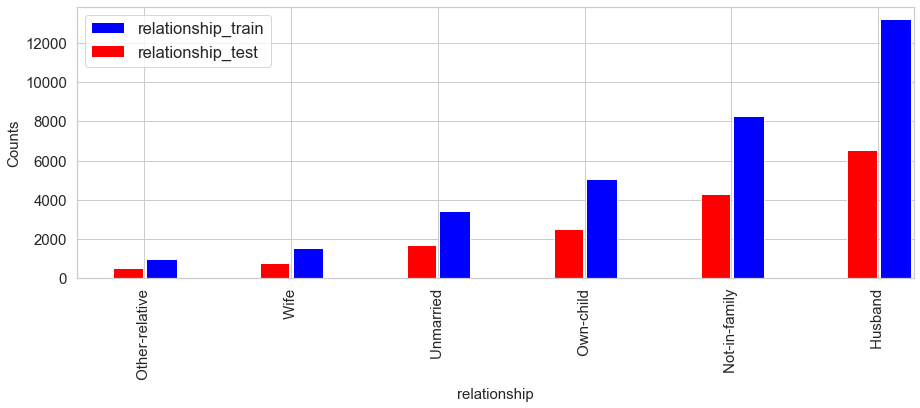

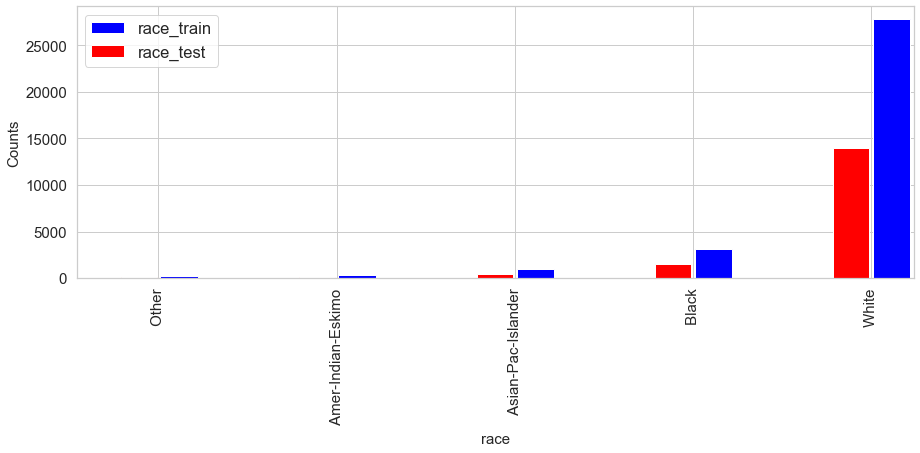

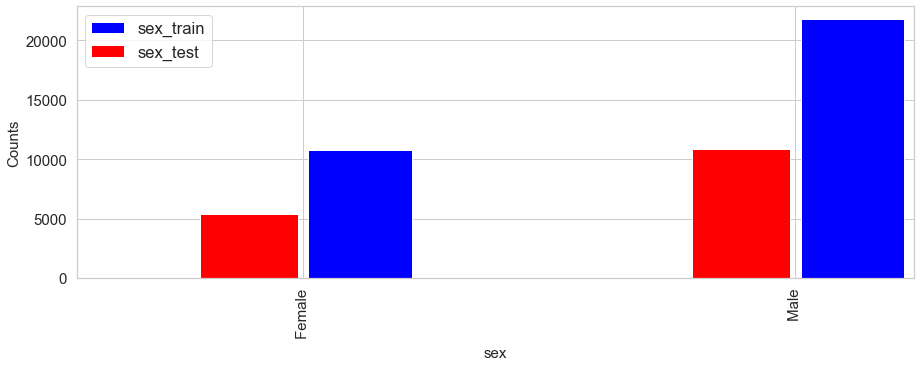

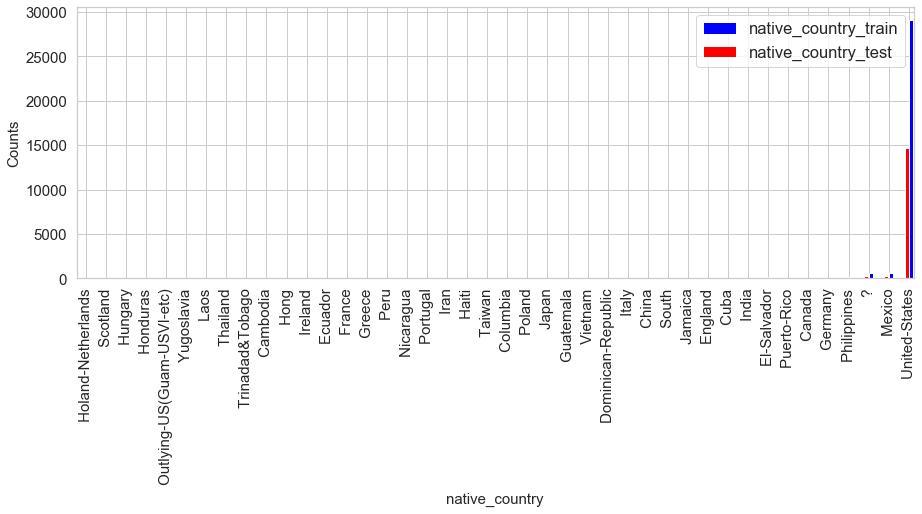

In [12]:
for col in da.cat_features:
    da.dist_cat(var= col, figsize= (15, 5))

**observations:**

1. workclass, occupation and native_country have missing values which is denoted by ?. This is not a problem for tree-based models however!


2. In variable native_country, one level "United-States" has the highest frequency (89.6%)!

In [13]:
country_counts= da.train['native_country'].value_counts(normalize= True)
print( len(country_counts ) )
country_counts

42


 United-States                 0.895995
 Mexico                        0.019639
 ?                             0.017887
 Philippines                   0.006085
 Germany                       0.004211
 Canada                        0.003719
 Puerto-Rico                   0.003504
 El-Salvador                   0.003258
 India                         0.003073
 Cuba                          0.002920
 England                       0.002766
 Jamaica                       0.002489
 South                         0.002459
 China                         0.002305
 Italy                         0.002244
 Dominican-Republic            0.002151
 Vietnam                       0.002059
 Guatemala                     0.001906
 Japan                         0.001906
 Poland                        0.001844
 Columbia                      0.001813
 Taiwan                        0.001567
 Haiti                         0.001352
 Iran                          0.001322
 Portugal                      0.001137


C:\Users\babak85\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


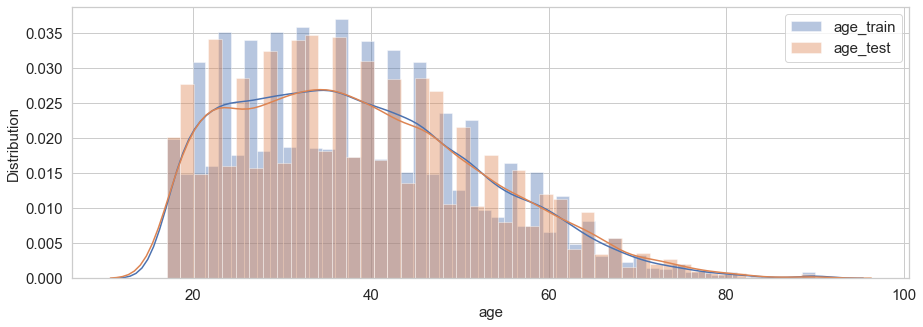

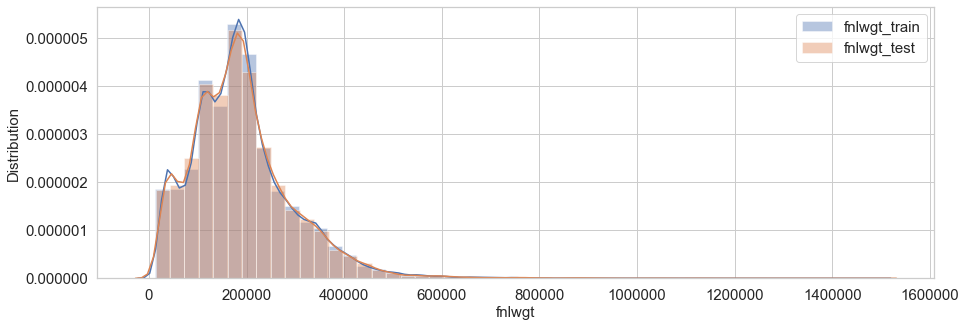

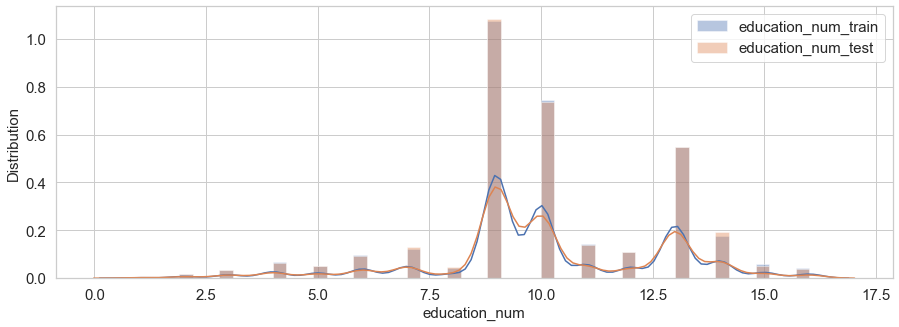

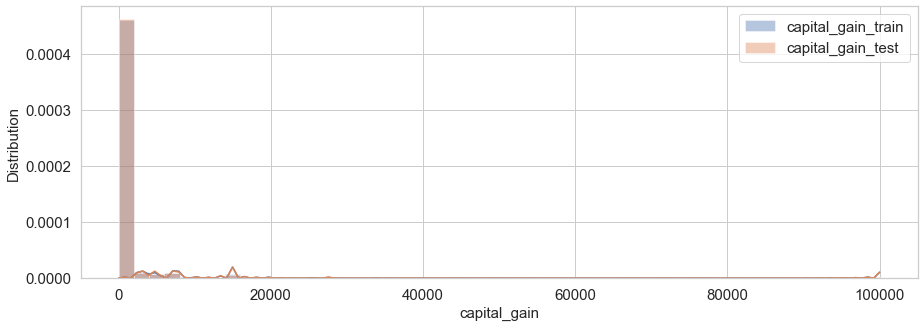

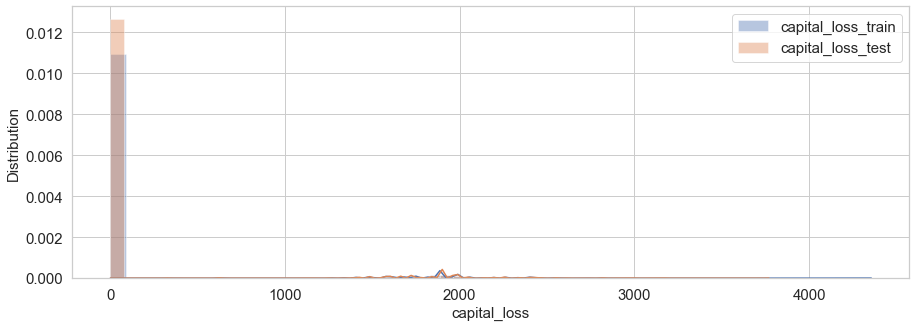

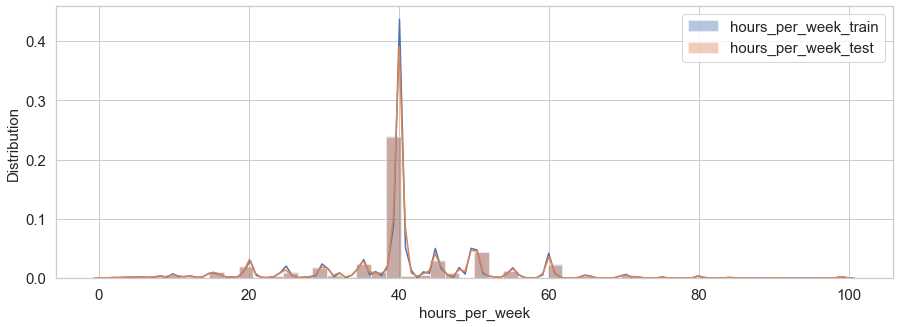

In [14]:
for col in da.num_features:
    da.dist_num(var= col, figsize= (15, 5))

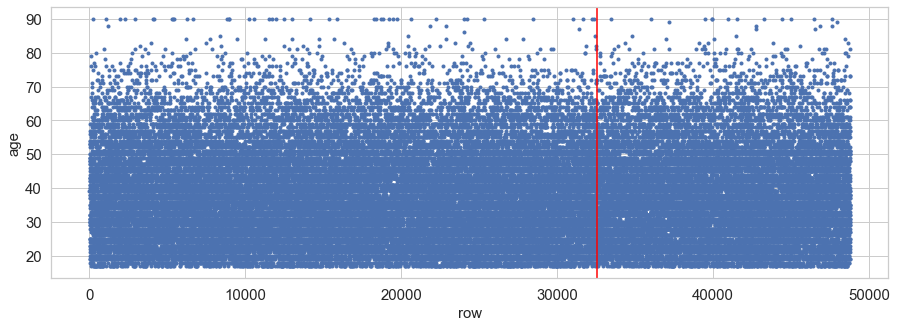

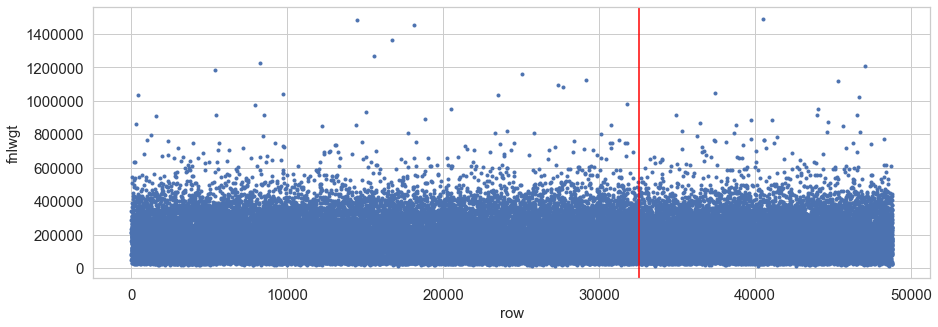

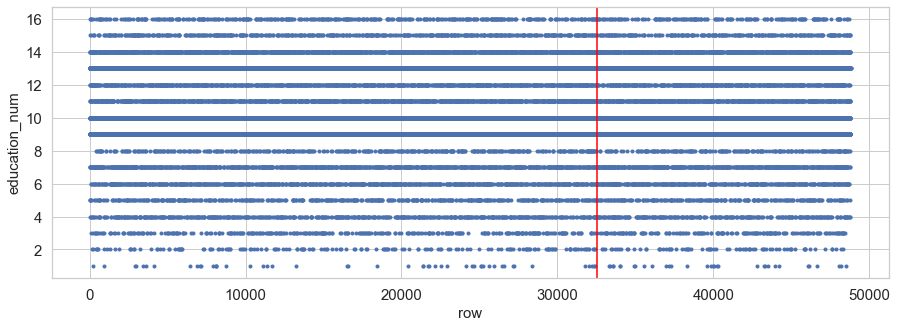

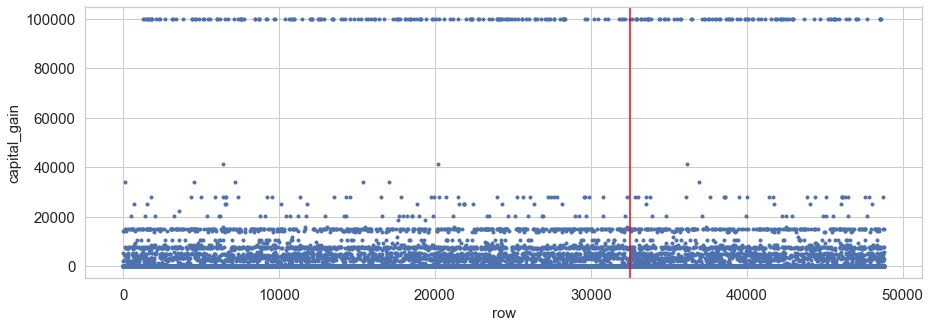

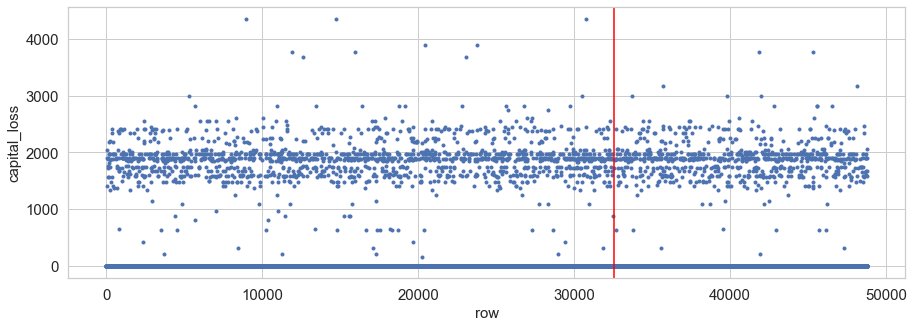

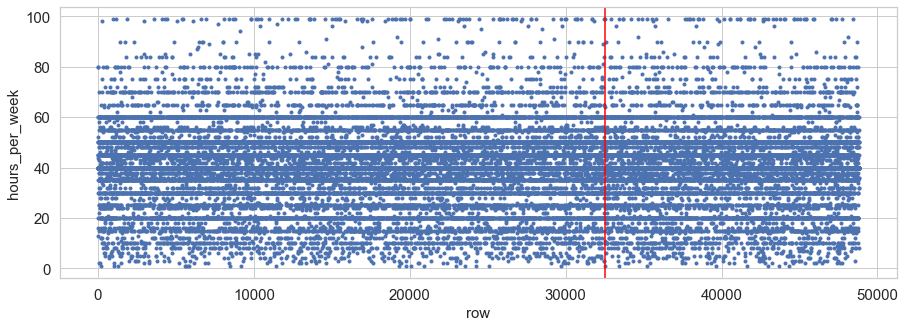

In [15]:
for col in da.num_features:
    da.dispersion_num(var= col, figsize= (15, 5))

**Observations from univariate EDA**

1. variable fnlwgt sounds to have outliers


2. variables capital_gain and capital_loss mostly have zero as their value


3. 40 hours is the most common level in hours_per_week variable

# Bivariate EDA

* Heatmap plot for discovering potential collenearity between variables

In [16]:
da.train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
display( da.train['income'].value_counts() )

 <=50K    24698
 >50K      7839
Name: income, dtype: int64

* Heatmap of correlations between variables usually concerns the numerical variables. 

* Nevertheles, one could make it work with categorical variables too. 

* If the number of categorical levels is low, we could one-hot encode them and easily calculate the correlation!

* Here first we consider the numerical variables

In [18]:
# a little data wrangling
df= da.train.drop(columns= da.cat_features).copy()
# dummy encode the response variable
df['income']= df['income'].apply( lambda x: 1 if x==' >50K' else 0)

display(df['income'].value_counts() )
display( df.head() )

0    24698
1     7839
Name: income, dtype: int64

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


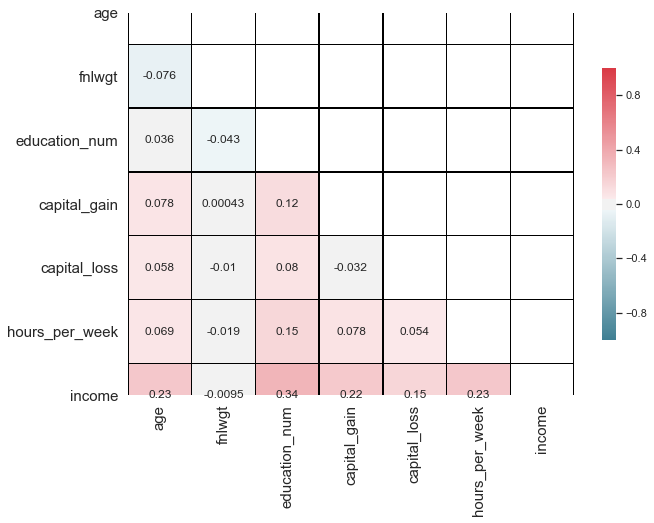

In [19]:
sns.set(style="whitegrid", font_scale= 1)
da.correlation_matrix(df= df, figsize= (10,10))

**Observations**

1. Income has the strongest correlation with the following vairables in order:
    1. education_num (0.34)
    2. age & hours_per_week (both 0.23)
    3. capital_gain (0.22)
 
 
 2. fnlwgt has a very low correlation (almost zero) with the response

**chi-2 test**

In [20]:
da.cat_features + ['income', 'education_num']

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income',
 'education_num']

In [21]:
sns.set(style="whitegrid", font_scale= 1)
table= da.chi2_heatmap( cat_features= da.cat_features + ['income', 'education_num'],
                       figsize= (10,10), alpha= 0.05)

TypeError: unsupported operand type(s) for -: 'list' and 'set'

If $p-value <= alpha$: 

        significant result, reject null hypothesis (H0), dependent.

If $p-value > alpha$: 

        not significant result, fail to reject null hypothesis (H0), independent.

# Feature Engineering

In [22]:
da.train.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


**general** 

1. We have many categorical variables with many levels (8 vs 6). This suggest that tree-based models (such as Random Forest, XGboost etc. ) maybe be better candidates. But this is not for sure.

**model specific** 

1. For tree-based models, we will label-encode the categorical variables


2. For linear-based models, we will one_hot_encode them.